### 경희대학교 산업경영공학과 2015100915 김태호

# LOL 플레이어의 실력 분석

BeautifulSoup와 urllib를 사용하여 플레이어의 데이터가 있는 op.gg에서 데이터를 가져와 LOL플레이어의 데이터 분석한다.

### 사용방법
1. 상단의 'Togle Toolbar'에 '>>'모양의 버튼을 누르고 빨간버튼(Restart the kernel)을 눌러주세요.
2. 아래에 "소환사명을 입력해주세요.: "가 나오면 소환사명을 입력해 주세요.(ex. 경희 대대두)

In [1]:
username = input("소환사명을 입력해주세요.: ")

소환사명을 입력해주세요.: 산업경영공학과


In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm_notebook
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)
import seaborn as sns

In [3]:
import urllib.request
import urllib.parse
url1 = "http://www.op.gg/summoner/userName=" #한글을 제외한 주소를 url1에 저장
#parse모듈을 사용해 한글부분을 유니코드로 치환
url2 = urllib.parse.quote_plus(str(username)) 
url = url1 + url2
page = urlopen(url)
soup = BeautifulSoup(page, "html.parser")

print(soup.prettify())

<!DOCTYPE html>
<!--
	  ,ad8888ba,   88888888ba         ,ad8888ba,    ,ad8888ba,
	 d8"'    `"8b  88      "8b       d8"'    `"8b  d8"'    `"8b
	d8'        `8b 88      ,8P      d8'           d8'
	88          88 88aaaaaa8P'      88            88
	88          88 88""""""'        88      88888 88      88888
	Y8,        ,8P 88               Y8,        88 Y8,        88
	 Y8a.    .a8P  88                Y8a.    .a88  Y8a.    .a88
	  `"Y8888Y"'   88     dev@op.gg   `"Y88888P"    `"Y88888P"

		 Copyright © 2013-2019 OP.GG. All rights reserved.
-->
<html lang="en_US">
 <head>
  <meta content="산업경영공학과 - Summoner Stats - League of Legends" name="title"/>
  <meta content="산업경영공학과 - Summoner Stats - League of Legends" property="og:title"/>
  <meta content="산업경영공학과 / Silver 1 10LP / 10W 8L Win Ratio 56% / Diana - 2W 4L Win Ratio 33%, Zoe - 2W 2L Win Ratio 50%, Lee Sin - 2W 2L Win Ratio 50%, Kha'Zix - 0W 3L Win Ratio 0%, Sivir - 2W 0L Win Ratio 100%" name="description"/>
  <meta content="산업경영공학과 / Silv

## 랭크게임 티어와 랭킹알아보기

In [26]:
import re #정규식
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all" # all 이면 여러개를 출력할 수 있도록 해줌

In [5]:
TierImage = soup.find('div','Medal').find('img','Image')
TierImage = TierImage['src']
TierImage = "https:" + TierImage
soup.find('div','Medal') #티어 이미지

<div class="Medal tip" title="Ranked Solo">
<img class="Image" src="//opgg-static.akamaized.net/images/medals/silver_1.png"/>
</div>

In [6]:
try:
    soup.find('div','LadderRank') #래더 랭크
    LadderRank = soup.find('div','LadderRank').get_text()
    LadderRank = re.split(('\n|\t'), LadderRank)
    LadderRank = "".join(LadderRank)
except:
    LadderRank = '랭크기록이 없습니다.'

<div class="LadderRank">
<a class="tip Link" href="/ranking/ladder/summonerName=%EC%82%B0%EC%97%85%EA%B2%BD%EC%98%81%EA%B3%B5%ED%95%99%EA%B3%BC" target="_blank" title="View your current ladder ranking">
						Ladder Rank <span class="ranking">177,922</span> (38.93% of top)
					</a>
</div>

In [7]:
soup.find('div','SummonerRatingMedium') #랭크게임 정보
SummonerRatingMedium = soup.find('div','SummonerRatingMedium').get_text()
SummonerRatingMedium = re.split(('\n|\t'), SummonerRatingMedium)
SummonerRatingMedium = " ".join(SummonerRatingMedium)

<div class="SummonerRatingMedium">
<div class="Medal tip" title="Ranked Solo">
<img class="Image" src="//opgg-static.akamaized.net/images/medals/silver_1.png"/>
</div>
<div class="TierRankInfo">
<div class="RankType">Ranked Solo</div>
<div class="Position">
<b>MIDDLE</b> 18 Games
			</div>
<div class="TierRank">Silver 1</div>
<div class="TierInfo">
<span class="LeaguePoints">
				10 LP
			</span>
							/
						<span class="WinLose">
<span class="wins">10W</span>
<span class="losses">8L</span>
<br/>
<span class="winratio">Win Ratio 56%</span>
</span>
</div>
<div class="LeagueName">
</div>
</div>
</div>

In [27]:
from IPython.display import Image
from IPython.core.display import HTML #이미지 출력
Image(url= TierImage)
username
LadderRank
SummonerRatingMedium

'산업경영공학과'

'Ladder Rank 177,922 (38.93% of top)'

'     Ranked Solo  MIDDLE 18 Games     Silver 1       10 LP            /        10W 8L  Win Ratio 56%      '

## 모스트 챔피언 분석하기

In [9]:
soup.find('div','MostChampionContent')

<div class="MostChampionContent tabItem overview-stats--all">
<div class="MostChampionContent" data-last-info="7" data-season="13" data-summoner-id="4475538">
<div class="ChampionBox Ranked">
<div class="Face" title="Diana">
<a href="/champion/diana/statistics" target="_blank">
<img alt="Diana" class="ChampionImage" src="//opgg-static.akamaized.net/images/lol/champion/Diana.png?image=w_45&amp;v=15354684000" width="45"/>
</a>
</div>
<div class="ChampionInfo">
<div class="ChampionName" title="Diana">
<a href="/champion/diana/statistics" target="_blank">
					Diana
				</a>
</div>
<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 157.7 (6.1)
							</div>
</div>
<div class="PersonalKDA">
<div class="KDA normal tip" title="(K 7 + A 3.17) / D 3.5">
<span class="KDA">2.90:1</span>
<span class="Text">KDA</span>
</div>
<div class="KDAEach">
<span class="Kill">7.0</span>
<span class="Bar">/</span>
<span class="Death">3.5</span>
<span class="Bar">/</span>
<span class="Assis

In [10]:
Champ = [] ; CS = [] ; KDARatio = [] ; tmp = [] ; K = [] ; D = [] ; A = [] ; WinRatio = [] ; PlayedGames = []
span = ['Kill','Death','Assist','KDA']
dict_tmp = {'ChampionName':Champ,'ChampionMinionKill':CS,'KDA':KDARatio,'Kill':K,'Death':D,'Assist':A, 
            'WinRatio':WinRatio,'Title':PlayedGames}

for x,y in dict_tmp.items():
    if x in span:
        tmp = soup.find('div','MostChampionContent').find_all('span',x)
    else:
        tmp = soup.find('div','MostChampionContent').find_all('div',x)
    for i in tmp:
        tmp = re.split(('\n|\t'),i.get_text())
        tmp = [n for n in tmp if n][0]
        y.append(tmp)
    y

['Diana', 'Zoe', 'Lee Sin', "Kha'Zix", 'Sivir', 'Yasuo', 'Kayn']

['CS 157.7 (6.1)',
 'CS 155.8 (5.6)',
 'CS 107.0 (4.6)',
 'CS 130.3 (4.4)',
 'CS 194.5 (7.7)',
 'CS 207.5 (8.1)',
 'CS 209.5 (5.0)']

['2.90:1', '3.44:1', '2.64:1', '2.00:1', '26.00:1', '3.60:1', '1.25:1']

['7.0', '3.8', '4.5', '5.0', '4.5', '5.0', '4.5']

['3.5', '2.3', '3.5', '5.3', '0.5', '2.5', '6.0']

['3.2', '4.0', '4.8', '5.7', '8.5', '4.0', '3.0']

['33%', '50%', '50%', '0%', '100%', '50%', '50%']

['6 Played',
 '4 Played',
 '4 Played',
 '3 Played',
 '2 Played',
 '2 Played',
 '2 Played']

In [11]:
InteractiveShell.ast_node_interactivity = "last" 

MostChampionContent_df = {'Champ':Champ, 'CS':CS, 'KDARatio':KDARatio, 'K':K,'D':D,'A':A
                          , 'WinRatio':WinRatio, 'PlayedGames':PlayedGames}
MCC_df = pd.DataFrame(MostChampionContent_df)
MCC_df.set_index('Champ',inplace=True)
print('가장 많이 플레이한 챔피언')
MCC_df

가장 많이 플레이한 챔피언


,CS,KDARatio,K,D,A,WinRatio,PlayedGames
Champ,,,,,,,
Diana,CS 157.7 (6.1),2.90:1,7.0,3.5,3.2,33%,6 Played
Zoe,CS 155.8 (5.6),3.44:1,3.8,2.3,4.0,50%,4 Played
Lee Sin,CS 107.0 (4.6),2.64:1,4.5,3.5,4.8,50%,4 Played
Kha'Zix,CS 130.3 (4.4),2.00:1,5.0,5.3,5.7,0%,3 Played
Sivir,CS 194.5 (7.7),26.00:1,4.5,0.5,8.5,100%,2 Played
Yasuo,CS 207.5 (8.1),3.60:1,5.0,2.5,4.0,50%,2 Played
Kayn,CS 209.5 (5.0),1.25:1,4.5,6.0,3.0,50%,2 Played


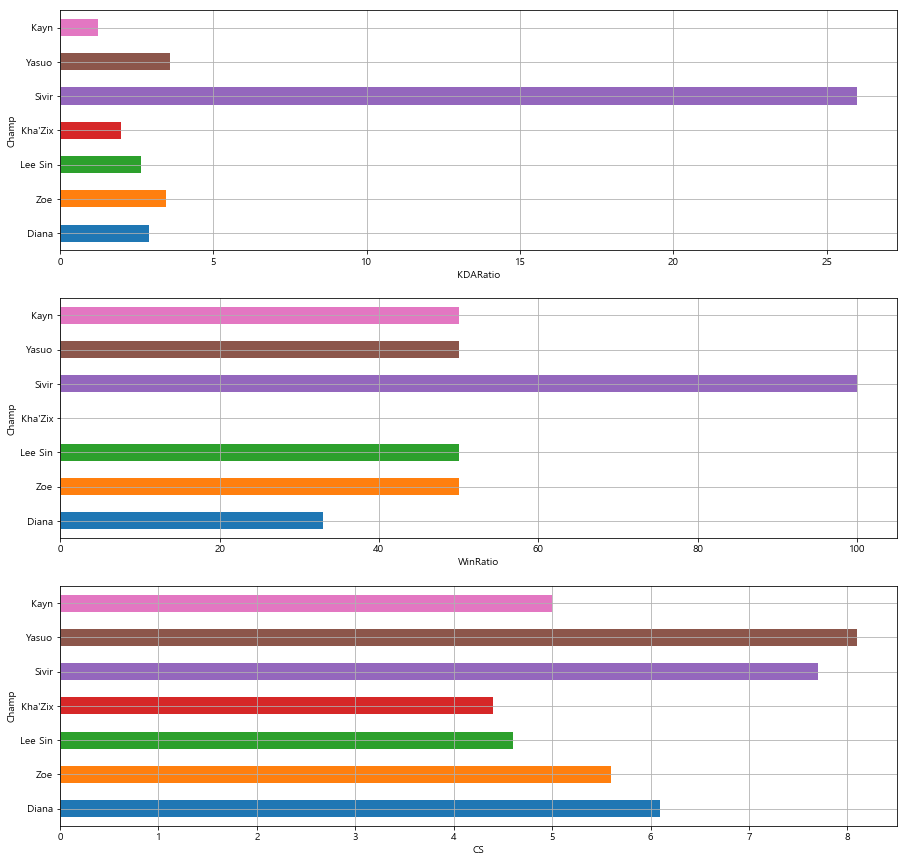

In [12]:
KDARatio_fl = [] ; WinRatio_fl = []
for i in KDARatio:
    tmp = re.split((':1|%'),i)
    tmp = [n for n in tmp if n][0]
    KDARatio_fl.append(tmp)
for i in WinRatio:
    tmp = re.split((':1|%'),i)
    tmp = [n for n in tmp if n][0]
    WinRatio_fl.append(tmp)
CS_new = []
n = 0
while n < len(list(MCC_df.index)):
    sw = 0
    k = ''
    tmp = MCC_df['CS'][n]
    for i in tmp:
        if i == '(':
            sw = 1
        if sw == 1:
            k += i
    CS_new.append(k.strip('(|)'))
    n += 1

ForGragh = {'Champ':Champ,'CS':CS_new,'KDARatio':KDARatio_fl, 'WinRatio':WinRatio_fl}
ForGragh = pd.DataFrame(ForGragh)
ForGragh['KDARatio'] = ForGragh['KDARatio'].astype(float)
ForGragh['WinRatio'] = ForGragh['WinRatio'].astype(float)
ForGragh['CS'] = ForGragh['CS'].astype(float)
ForGragh = ForGragh.set_index('Champ')
plt.figure()
plt.subplot(311)
ForGragh['KDARatio'].plot(kind='barh', grid=True, figsize=(15,15))
plt.xlabel('KDARatio')
plt.subplot(312)
ForGragh['WinRatio'].plot(kind='barh', grid=True, figsize=(15,15))
plt.xlabel('WinRatio')
plt.subplot(313)
ForGragh['CS'].plot(kind='barh', grid=True, figsize=(15,15))
plt.xlabel('CS')
plt.show()

## 최근 20경기 분석하기

In [13]:
soup.find('div','GameItemList').find_all('div','GameItemWrap')

[<div class="GameItemWrap">
 <div class="GameItem Win " data-game-id="3515549184" data-game-result="win" data-game-time="1548695008" data-summoner-id="4475538">
 <div class="Content">
 <div class="GameStats">
 <div class="GameType">
 					URF
 				</div>
 <div class="TimeStamp"><span class=" _timeago _timeCount" data-datetime="1548695008" data-interval="60" data-type="">2019-01-29 02:03:28</span></div>
 <div class="Bar"></div>
 <div class="GameResult">
 											Victory									</div>
 <div class="GameLength">16m 8s</div>
 </div>
 <div class="GameSettingInfo">
 <div class="ChampionImage">
 <a href="/champion/riven/statistics" target="_blank"><img alt="Riven" class="Image" src="//opgg-static.akamaized.net/images/lol/champion/Riven.png?image=w_46&amp;v=15354684000"/></a>
 </div>
 <div class="SummonerSpell">
 <div class="Spell">
 <img alt="Flash" class="Image tip" src="//opgg-static.akamaized.net/images/lol/spell/SummonerFlash.png?image=w_22&amp;v=15354684000" title="&lt;b style='color:

In [14]:
Champ = [] ; GameType = [] ; CS = [] ; KDARatio_ = [] ; tmp = [] ; K = [] ; D = [] ; A = [] 
CKRate_ = [] ; GameResult = [] 
span = ['Kill','Death','Assist','KDARatio','CS','Wards']
dict_tmp = {'ChampionName':Champ,'GameType':GameType,'CS':CS,'KDARatio':KDARatio_,'Kill':K,'Death':D,'Assist':A, 
            'CKRate' : CKRate_,'GameResult':GameResult}

for x,y in dict_tmp.items():
    if x in span:
        tmp = soup.find('div','GameItemList').find_all('span',x)
    else:
        tmp = soup.find('div','GameItemList').find_all('div',x)
    for i in tmp:
        tmp = re.split(('\n|\t'),i.get_text())
        tmp = [n for n in tmp if n][0]
        y.append(tmp)
tmp = []
for i in K:
    if i < '9999999':
        tmp.append(i)
K = tmp        

In [15]:
Recent_Games = {'ChampionName':Champ,'GameType':GameType,'CS':CS,'KDARatio':KDARatio_,'K':K,
                          'D':D,'A':A, 'CKRate' : CKRate_,'GameResult':GameResult}
Recent_Games = pd.DataFrame(Recent_Games)
Recent_Games.set_index('ChampionName',inplace=True)
print('최근 20경기')
Recent_Games

최근 20경기


,GameType,CS,KDARatio,K,D,A,CKRate,GameResult
ChampionName,,,,,,,,
Riven,URF,60 (3.7),2.11:1,7,9,12,P/Kill 36%,Victory
Nidalee,URF,17 (2),0.67:1,2,3,0,P/Kill 25%,Defeat
Xayah,URF,78 (6.2),1.57:1,14,14,8,P/Kill 85%,Defeat
Aatrox,Normal,112 (5.6),1.00:1,2,3,1,P/Kill 27%,Defeat
Akali,Normal,169 (5.6),1.43:1,7,7,3,P/Kill 43%,Defeat
Sivir,Ranked Solo,151 (7),Perfect,3,0,3,P/Kill 33%,Victory
Sivir,Ranked Solo,238 (8.3),20.00:1,6,1,14,P/Kill 50%,Victory
Vayne,Ranked Solo,143 (5.8),2.67:1,2,3,6,P/Kill 27%,Victory
Galio,Ranked Solo,149 (6.8),15.00:1,7,1,8,P/Kill 75%,Victory


In [16]:
# 분석하기 쉽게 전처리
CS_min = []
n = 0
while n < len(list(Recent_Games.index)):
    sw = 0
    k = ''
    tmp = CS[n]
    for i in tmp:
        if i == '(':
            sw = 1
        if sw == 1:
            k += i
    CS_min.append(k.strip('(|)'))
    n += 1
KDARatio = []
for i in KDARatio_:
    tmp = re.split((':1'),i)
    KDARatio.append(tmp[0])
CKRate = []
for i in CKRate_:
    tmp = re.split(('%|P/Kill '),i)
    CKRate.append(tmp[1])

In [17]:
Recent_Games2 = {'ChampionName':Champ,'GameType':GameType,'CS_min':CS_min,'KDARatio':KDARatio,'K':K,
                          'D':D,'A':A, 'CKRate' : CKRate,'GameResult':GameResult}
Recent_Games2 = pd.DataFrame(Recent_Games2)
Recent_Games2.set_index('ChampionName',inplace=True)

Recent_Games2['CS_min'] =Recent_Games2['CS_min'].astype(float) 
Recent_Games2['CKRate'] =Recent_Games2['CKRate'].astype(float) 
Recent_Games2['K'] =Recent_Games2['K'].astype(float) 
Recent_Games2['D'] =Recent_Games2['D'].astype(float) 
Recent_Games2['A'] =Recent_Games2['A'].astype(float) 

Recent_Games2

,GameType,CS_min,KDARatio,K,D,A,CKRate,GameResult
ChampionName,,,,,,,,
Riven,URF,3.7,2.11,7.0,9.0,12.0,36.0,Victory
Nidalee,URF,2.0,0.67,2.0,3.0,0.0,25.0,Defeat
Xayah,URF,6.2,1.57,14.0,14.0,8.0,85.0,Defeat
Aatrox,Normal,5.6,1.00,2.0,3.0,1.0,27.0,Defeat
Akali,Normal,5.6,1.43,7.0,7.0,3.0,43.0,Defeat
Sivir,Ranked Solo,7.0,Perfect,3.0,0.0,3.0,33.0,Victory
Sivir,Ranked Solo,8.3,20.00,6.0,1.0,14.0,50.0,Victory
Vayne,Ranked Solo,5.8,2.67,2.0,3.0,6.0,27.0,Victory
Galio,Ranked Solo,6.8,15.00,7.0,1.0,8.0,75.0,Victory


20경기 평균 기록

In [18]:
Total_vic = list(Recent_Games2['GameResult']).count('Victory')
Total_def = list(Recent_Games2['GameResult']).count('Defeat')
Total_wr = Total_vic/(Total_vic+Total_def)*100

Total_wr = round(Total_wr,2)
Total_KDA = round((Recent_Games2['K'].sum()+Recent_Games2['A'].sum())/Recent_Games2['D'].sum(),2)
Total_cs = round(Recent_Games2['CS_min'].mean(),2)
Total_CKRate = Recent_Games2['CKRate'].mean()
print("최근 20경기 승률은 {}%이고 평점은 {}점이다. 한 경기당 분당CS는 {}개이고 평균 킬관여율은 {}%이다."
      .format(Total_wr,Total_KDA,Total_cs,Total_CKRate))

최근 20경기 승률은 55.0%이고 평점은 3.18점이다. 한 경기당 분당CS는 5.68개이고 평균 킬관여율은 49.95%이다.


챔피언별 기록

In [19]:
grouped = Recent_Games2[['CS_min','K','D','A','CKRate']].groupby(level = 0) 
Recent_Games3 = grouped.mean()
Recent_Games3['KDA'] = (Recent_Games3['K']+Recent_Games3['A'])/Recent_Games3['D']
Recent_Games3 = Recent_Games3.applymap(lambda x : round(x,2)) 
Recent_Games3['PlayedGames'] = grouped.count()['CS_min']

In [20]:
# GameResult 와 index를 key로 만든후 카운트 한다.
grouped2 = Recent_Games2[['K']].groupby([Recent_Games2.index,Recent_Games2['GameResult']]) 
grouped3 = grouped2.count()

WinRatio = []
for tmp in Recent_Games3.index:
    try:
        grouped_vic = grouped3.loc[(tmp,'Victory'), 'K'] 
    except:
        grouped_vic = 0
    try:
        grouped_def = grouped3.loc[(tmp,'Defeat'), 'K'] 
    except:
        grouped_def = 0
    grouped_wr = grouped_vic/(grouped_vic+grouped_def)*100
    grouped_wr = round(grouped_wr,2)
    WinRatio.append(grouped_wr)

In [21]:
Recent_Games3['WinRatio'] = WinRatio
Recent_Games3

,CS_min,K,D,A,CKRate,KDA,PlayedGames,WinRatio
ChampionName,,,,,,,,
Aatrox,5.60,2.00,3.00,1.0,27.00,1.000000,1,0.00
Akali,5.60,7.00,7.00,3.0,43.00,1.430000,1,0.00
Cassiopeia,8.00,5.00,0.00,5.0,63.00,inf,1,100.00
Evelynn,3.50,3.00,8.00,1.0,50.00,0.500000,1,0.00
Fizz,7.00,7.00,0.00,7.0,45.00,inf,1,100.00
Galio,6.80,7.00,1.00,8.0,75.00,15.000000,1,100.00
Karthus,8.20,2.00,4.00,17.0,56.00,4.750000,1,100.00
Kha'Zix,4.10,4.00,5.00,8.0,57.00,2.400000,1,0.00
Lux,2.70,13.00,5.00,24.0,82.00,7.400000,1,100.00


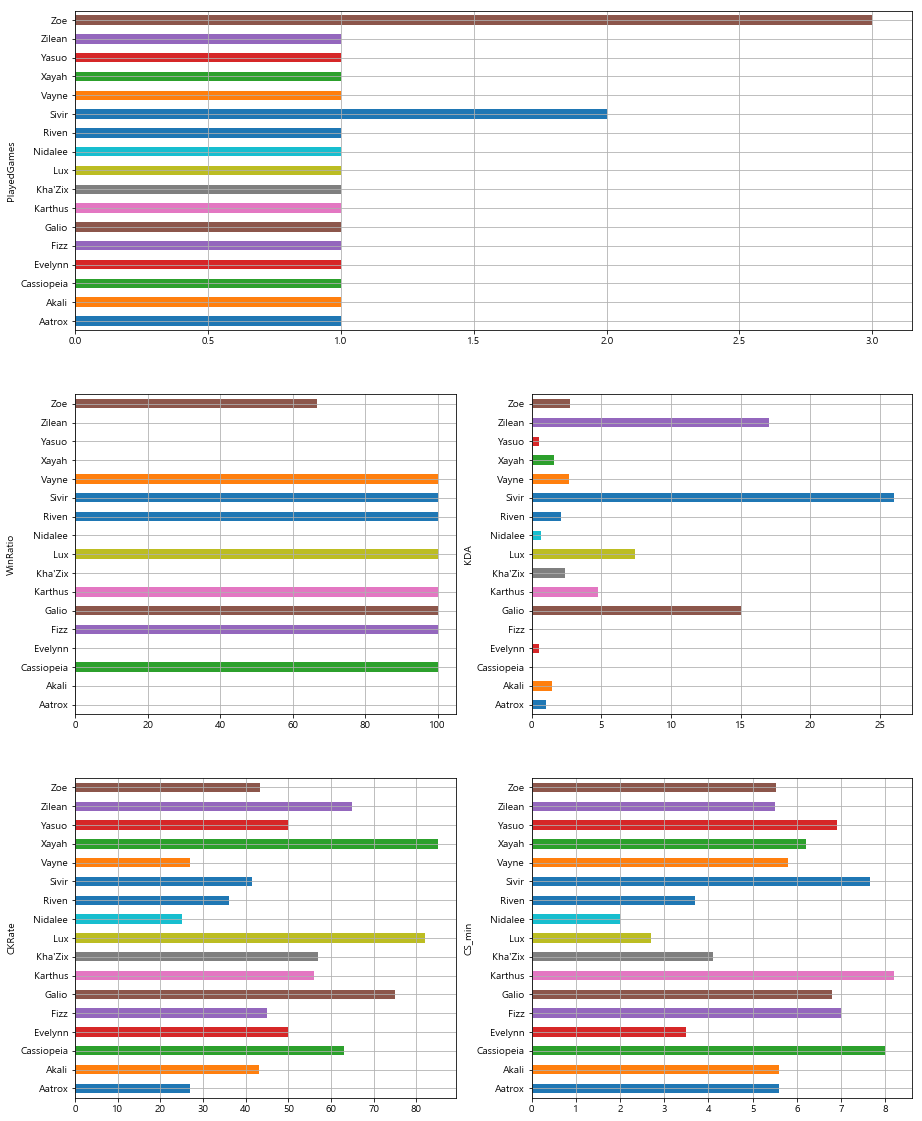

In [22]:
plt.figure()
plt.subplot(311)
Recent_Games3['PlayedGames'].plot(kind='barh', grid=True, figsize=(15,20))
plt.ylabel('PlayedGames')
plt.subplot(323)
Recent_Games3['WinRatio'].plot(kind='barh', grid=True, figsize=(15,20))
plt.ylabel('WinRatio')
plt.subplot(324)
Recent_Games3['KDA'].plot(kind='barh', grid=True, figsize=(15,20))
plt.ylabel('KDA')
plt.subplot(325)
Recent_Games3['CKRate'].plot(kind='barh', grid=True, figsize=(15,20))
plt.ylabel('CKRate')
plt.subplot(326)
Recent_Games3['CS_min'].plot(kind='barh', grid=True, figsize=(15,20))
plt.ylabel('CS_min')
plt.show()

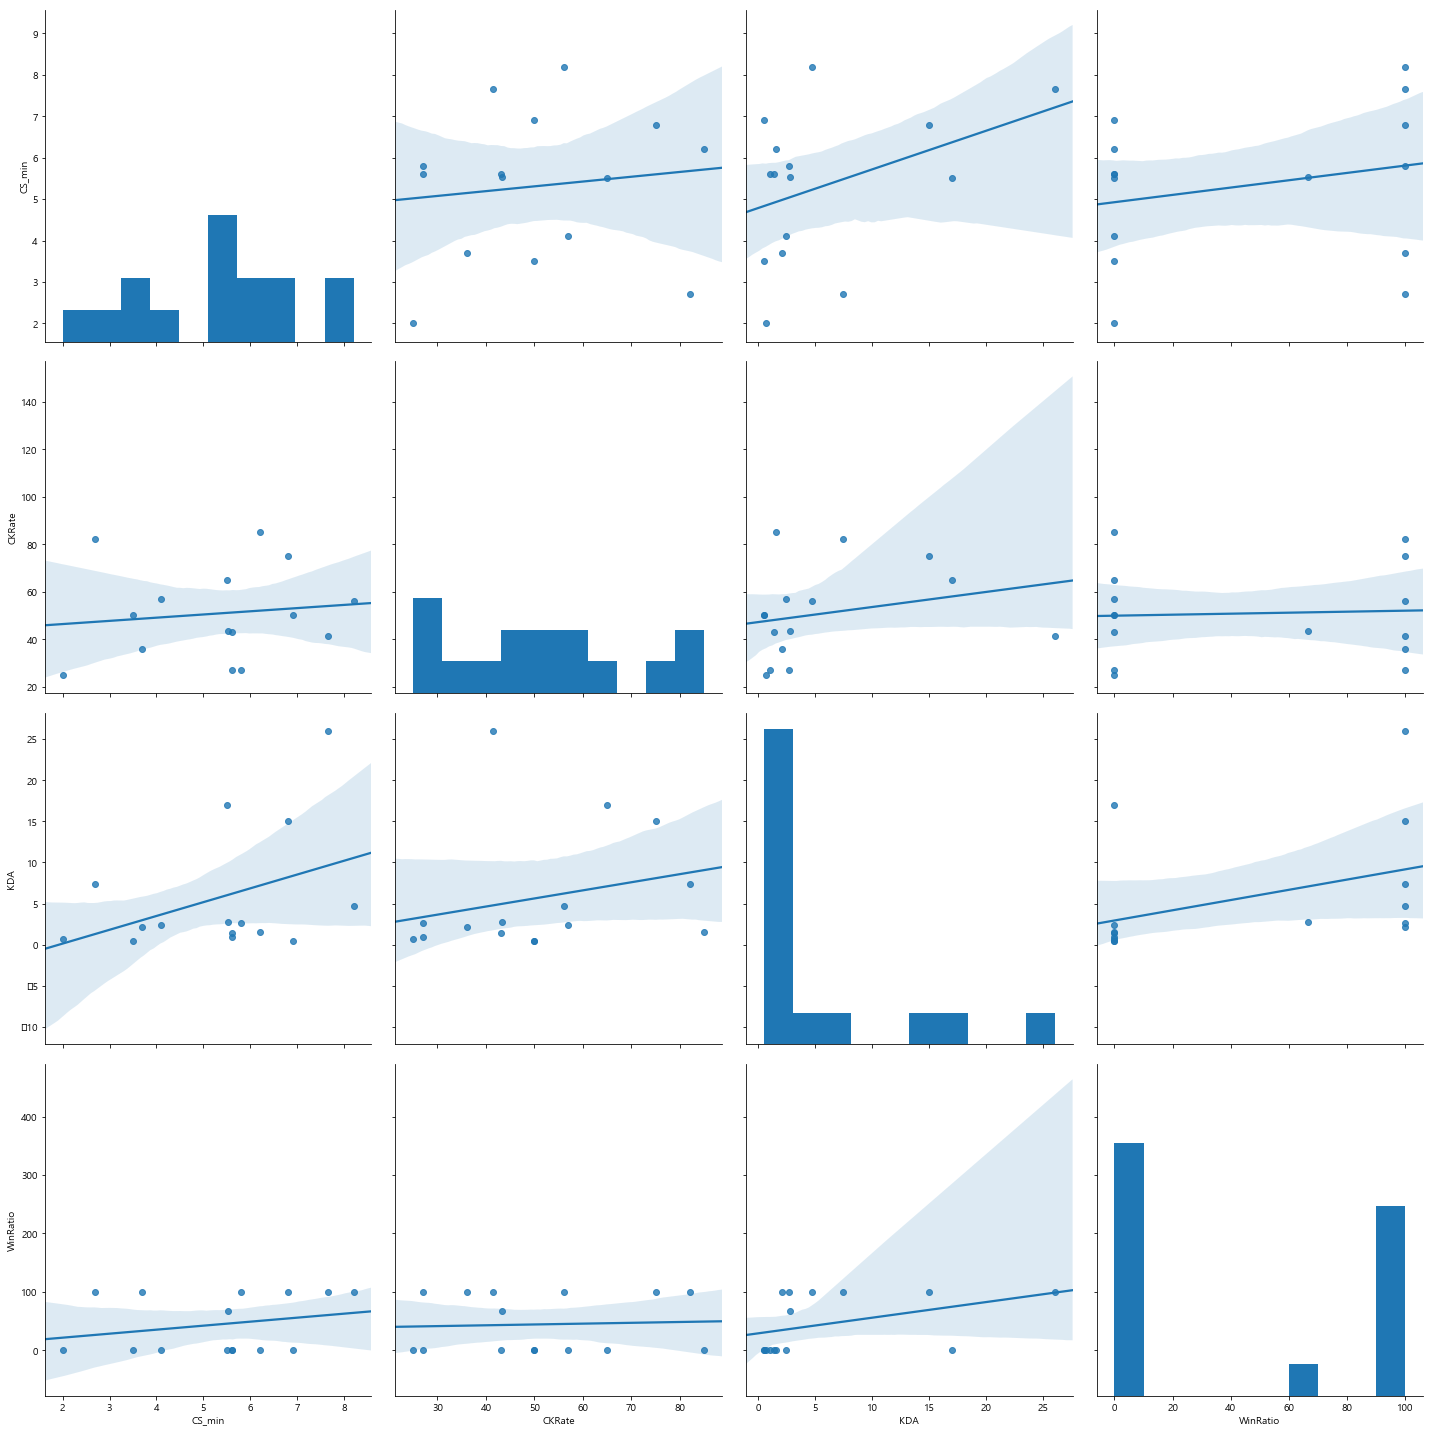

In [23]:
sns.pairplot(Recent_Games3[Recent_Games3['KDA'] != np.inf], vars=["CS_min", "CKRate", "KDA",'WinRatio'], kind='reg', size=5)
plt.show()